In [1]:
import numpy as np

import cv2
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.layers import Dropout ,Activation,AveragePooling2D, normalization,Convolution2D,MaxPooling2D, Conv2D
from keras.layers import Dense, Flatten, Reshape, Input
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras import applications
from keras import optimizers
import keras

C:\Users\windo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
x = np.load('X_train.npy')
y = np.load('Y_train.npy')

In [3]:
print(x.shape, y.shape)

(8352, 100, 100, 3) (8352,)


In [18]:
labels = {0:'boxes-containers', \
       1:'cans', \
       2:'cardboard_boxes', \
       3:'jars', \
       4:'miscellaneous', \
       5:'packets'}

labels[1]

'cans'

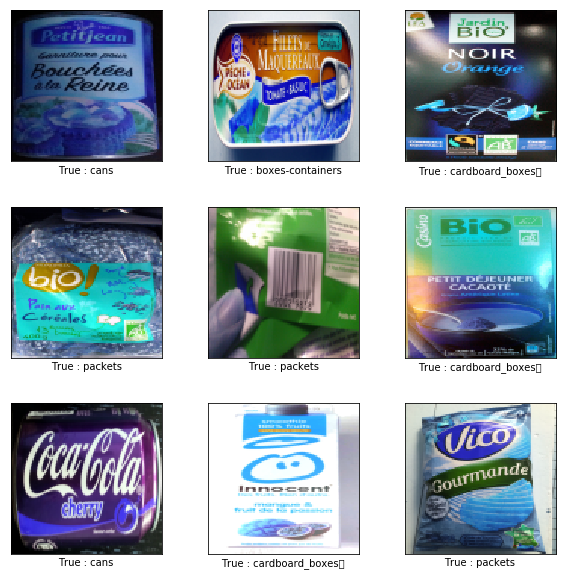

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.subplots_adjust(hspace = 0.3)

idx = np.random.choice(np.arange(len(x)), 9, replace=False)
random_images = x[idx]
random_true_classes = y[idx]

for i, ax in enumerate(axes.flat):
    ax.imshow(random_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    label = 'True : {}'.format(labels[int(random_true_classes[i])])
    ax.set_xlabel(label)

In [5]:
y = keras.utils.to_categorical(y, num_classes=6)
x = x/255

In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [7]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(6, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [8]:
train_datagen = ImageDataGenerator(
#     rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# test_datagen = ImageDataGenerator(
#     rescale=1./255
# )

In [9]:
train_datagen.fit(x)
# test_datagen.fit(xtest)

In [10]:
model.fit_generator(train_datagen.flow(x, y, batch_size=32),\
                    steps_per_epoch=x.shape[0] / 32, epochs=10)

Epoch 1/10
261/261 [==============================] - 61s 232ms/step - loss: 1.2695 - acc: 0.4962
Epoch 2/10
261/261 [==============================] - 48s 185ms/step - loss: 0.9743 - acc: 0.6337
Epoch 3/10
261/261 [==============================] - 48s 185ms/step - loss: 0.8755 - acc: 0.6752
Epoch 4/10
261/261 [==============================] - 48s 185ms/step - loss: 0.8325 - acc: 0.6852
Epoch 5/10
261/261 [==============================] - 48s 185ms/step - loss: 0.7901 - acc: 0.7047
Epoch 6/10
261/261 [==============================] - 48s 186ms/step - loss: 0.7574 - acc: 0.7235
Epoch 7/10
261/261 [==============================] - 49s 186ms/step - loss: 0.7278 - acc: 0.7276
Epoch 8/10
261/261 [==============================] - 49s 187ms/step - loss: 0.7075 - acc: 0.7371
Epoch 9/10
261/261 [==============================] - 48s 186ms/step - loss: 0.6912 - acc: 0.7419
Epoch 10/10
261/261 [==============================] - 48s 186ms/step - loss: 0.6712 - acc: 0.7542


In [14]:
model.fit_generator(train_datagen.flow(x, y, batch_size=32),\
                    steps_per_epoch=x.shape[0] / 32, initial_epoch = 10, epochs=20)

Epoch 11/20
261/261 [==============================] - 49s 187ms/step - loss: 0.6459 - acc: 0.7553
Epoch 12/20
261/261 [==============================] - 48s 185ms/step - loss: 0.6351 - acc: 0.7622
Epoch 13/20
261/261 [==============================] - 48s 185ms/step - loss: 0.6268 - acc: 0.7696
Epoch 14/20
261/261 [==============================] - 48s 185ms/step - loss: 0.6055 - acc: 0.7759
Epoch 15/20
261/261 [==============================] - 48s 186ms/step - loss: 0.5852 - acc: 0.7840
Epoch 16/20
261/261 [==============================] - 49s 186ms/step - loss: 0.5788 - acc: 0.7847
Epoch 17/20
261/261 [==============================] - 48s 185ms/step - loss: 0.5652 - acc: 0.7925
Epoch 18/20
261/261 [==============================] - 48s 186ms/step - loss: 0.5553 - acc: 0.7969
Epoch 19/20
261/261 [==============================] - 48s 185ms/step - loss: 0.5254 - acc: 0.8057
Epoch 20/20
261/261 [==============================] - 49s 187ms/step - loss: 0.5265 - acc: 0.8085


In [30]:
import os
import cv2

In [28]:
test_images_path = "C:/users/windo/Desktop/OFF/test_images/"
test_images = os.listdir(test_images_path)

In [29]:
len(test_images)

16

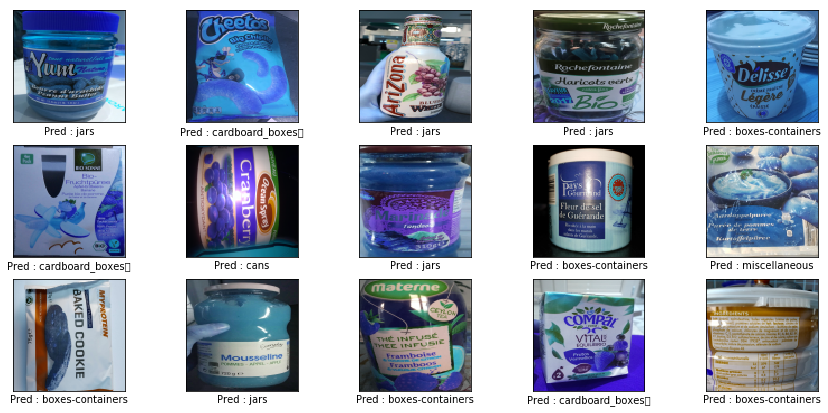

In [43]:
fig, axes = plt.subplots(3, 5, figsize=(15, 7))
# fig.subplots_adjust(hspace = 0.3)

for i, ax in enumerate(axes.flat):
    img = cv2.imread(test_images_path + '/' + test_images[i])
    img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    pred = model.predict(img.reshape(1, 100, 100, 3))
    label = 'Pred : {}'.format(labels[int(np.argmax(pred))])
    ax.set_xlabel(label)